In [466]:
## Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [467]:
## Loading train and test data

train_data=pd.read_csv('train.csv')

test_data=pd.read_csv('test.csv')

gender=pd.read_csv('gender_submission.csv')





In [468]:
## Exploratory Analysis


train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [469]:
## Dealing with "Age" 177 missing values

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


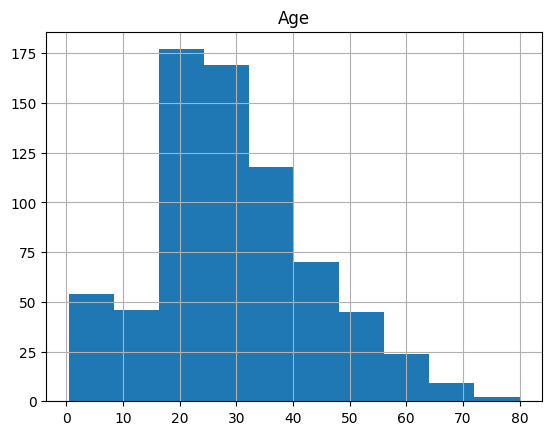

In [470]:
train_data.hist('Age')
plt.show()

In [471]:
## "Age" appears to be skewed; hence, the missing values will be replaced by the median.

train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())

In [472]:
## Dealing with "Embarked" 2 missing values

train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [473]:
train_data.Embarked.mode()


0    S
Name: Embarked, dtype: object

In [474]:
## The mode is 'S'. There, the missing values will be replaced by the 'S'.

train_data['Embarked']=train_data['Embarked'].replace(np.nan,"S")

In [475]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [476]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [477]:
## Dealing with 'Cabin': 686 missing values out 891. This variable will not be used as a predictor.

train_data.drop(['Cabin'],axis=1,inplace=True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


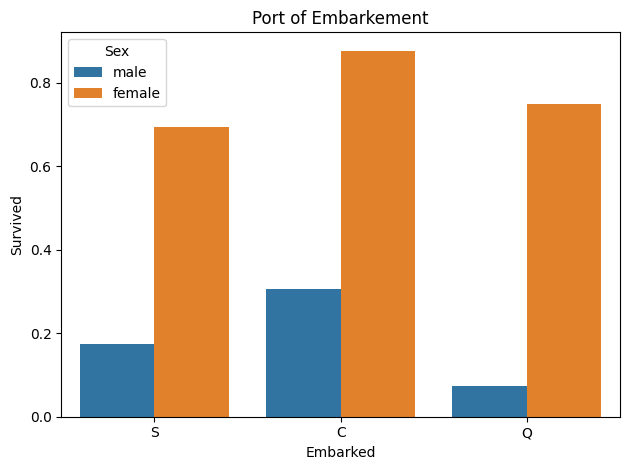

In [478]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train_data,errorbar=None)
plt.title('Port of Embarkement')
plt.tight_layout()
plt.show()

In [479]:
## Drop the Variable ticket as it is not homogenous. Pclass contains details of the ticket class.

train_data.drop(['Ticket'],axis=1,inplace=True)

In [480]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


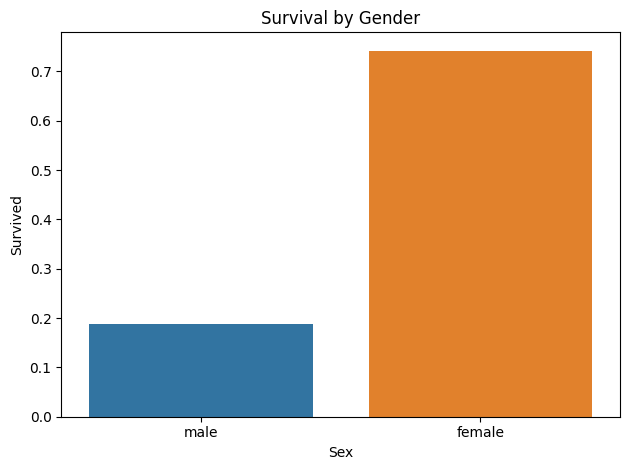

In [481]:
## Relatioship between gender and "Survived"
sns.barplot(x='Sex', y='Survived', data=train_data,errorbar=None)
plt.title('Survival by Gender')
plt.tight_layout()
plt.show()

In [482]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [483]:
## Categorise the columns Embark, Sex and Pclass. Drop the columns PassengerId and Name.


a=pd.get_dummies(train_data.Embarked)
b=pd.get_dummies(train_data.Sex)
c=pd.get_dummies(train_data.Pclass)
train_data.drop(['Embarked'],axis=1,inplace=True)
train_data.drop(['Sex'],axis=1,inplace=True)
train_data.drop(['Pclass'],axis=1,inplace=True)
train_data.drop(['PassengerId'],axis=1,inplace=True)
train_data.drop(['Name'],axis=1,inplace=True)





In [484]:
## Join the new varibales to the dataframe
train_data=train_data.join(a)
train_data=train_data.join(b)
train_data=train_data.join(c)



In [485]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   C         891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
 8   female    891 non-null    uint8  
 9   male      891 non-null    uint8  
 10  1         891 non-null    uint8  
 11  2         891 non-null    uint8  
 12  3         891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


In [486]:
train_data

,Survived,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,19.0,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,28.0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [487]:
##Rename the columns "1","2","3"

train_data.rename(columns={1: '1st_class', 2: '2nd_class',3:'3rd_class'},inplace=True)

In [488]:
##Variable reduction. We will create a new variable called "alone". It will be a combination of "SibSp" and "Parch". 
## alone==0 if the traveller was not accompanied by a familly member Or alone==1 if the traveller was accompanied at least by one family member.

train_data['alone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)

train_data.drop('Parch', axis=1,inplace=True)

train_data.drop('SibSp', axis=1,inplace=True)

In [489]:
train_data.describe()

,Survived,Age,Fare,C,Q,S,female,male,1st_class,2nd_class,3rd_class,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,32.204208,0.188552,0.086420,0.725028,0.352413,0.647587,0.242424,0.206510,0.551066,0.602694
std,0.486592,13.019697,49.693429,0.391372,0.281141,0.446751,0.477990,0.477990,0.428790,0.405028,0.497665,0.489615
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

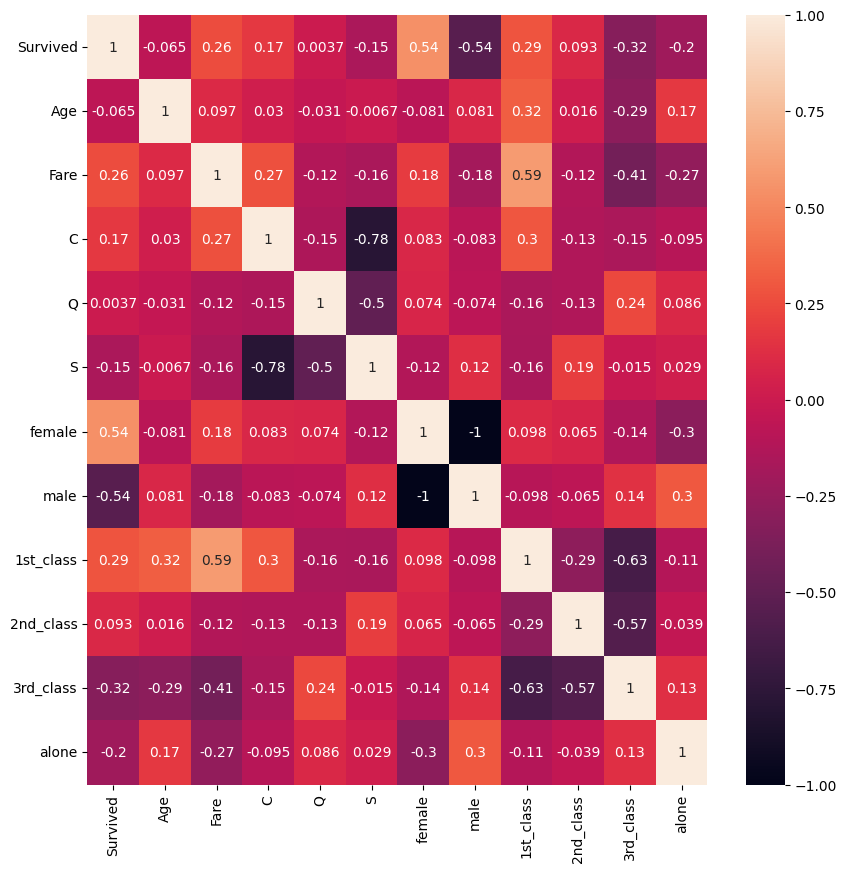

In [490]:
## Correlation matrix
corr_matrix=train_data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2g')


In [491]:
## Dealing with test_data
#Extract survived from gender and join it to the test_data

test_data.insert(1,'Survived',gender['Survived'])


In [492]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [493]:
## Perform similar exploratory and data analysis to test_data

In [494]:
## Dealing with "Age" 86 missing values

test_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


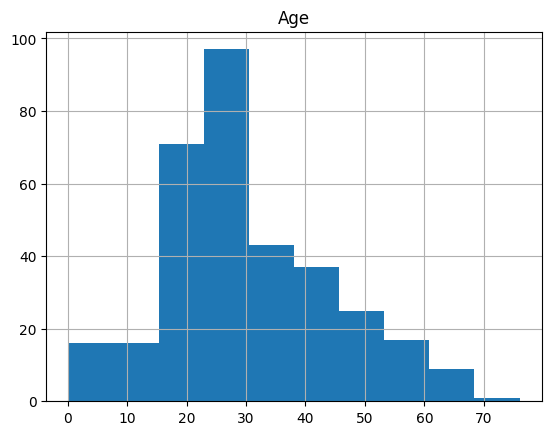

In [495]:
test_data.hist('Age')
plt.show()

In [496]:
## "Age" appears to be skewed; hence, the missing values will be replaced by the median.

test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())

In [497]:
## Dealing with 'Cabin':As we have 686 missing values out 891 in the training data. This variable will not be used as a predictor.

test_data.drop(['Cabin'],axis=1,inplace=True)


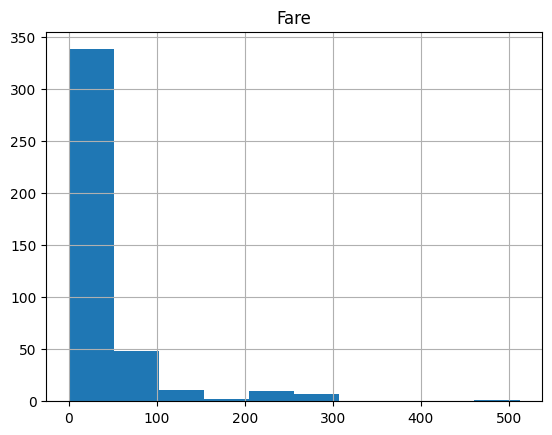

In [498]:
## Dealing with 1 "Fare" missing value.

test_data.hist('Fare')
plt.show()

In [499]:
## Skewed data. The missing fare will be replaced by the median.

test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median())

In [500]:
## Drop the Variable ticket as it is not homogenous. Pclass contains details of the ticket class.

test_data.drop(['Ticket'],axis=1,inplace=True)

In [501]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [502]:
## Categorise the columns Embark, Sex and Pclass. Drop the columns PassengerId and Name.
a=pd.get_dummies(test_data.Embarked)
b=pd.get_dummies(test_data.Sex)
c=pd.get_dummies(test_data.Pclass)
test_data.drop(['Embarked'],axis=1,inplace=True)
test_data.drop(['Sex'],axis=1,inplace=True)
test_data.drop(['Pclass'],axis=1,inplace=True)
test_data.drop(['PassengerId'],axis=1,inplace=True)
test_data.drop(['Name'],axis=1,inplace=True)

In [503]:
test_data=test_data.join(a)
test_data=test_data.join(b)
test_data=test_data.join(c)

In [504]:
##Rename the columns "1","2","3"

test_data.rename(columns={1: '1st_class', 2: '2nd_class',3:'3rd_class'},inplace=True)

In [505]:
##Variable reduction. We will create a new variable called "alone". It will be a combination of "SibSp" and "Parch". 
## alone==0 if the traveller was not accompanied by a familly member Or alone==1 if the traveller was accompanied at least by one family member.

test_data['alone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('Parch', axis=1,inplace=True)

test_data.drop('SibSp', axis=1,inplace=True)

In [506]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   418 non-null    int64  
 1   Age        418 non-null    float64
 2   Fare       418 non-null    float64
 3   C          418 non-null    uint8  
 4   Q          418 non-null    uint8  
 5   S          418 non-null    uint8  
 6   female     418 non-null    uint8  
 7   male       418 non-null    uint8  
 8   1st_class  418 non-null    uint8  
 9   2nd_class  418 non-null    uint8  
 10  3rd_class  418 non-null    uint8  
 11  alone      418 non-null    int32  
dtypes: float64(2), int32(1), int64(1), uint8(8)
memory usage: 14.8 KB


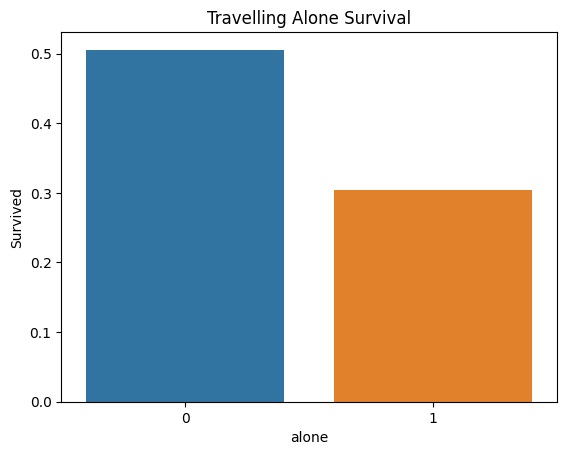

In [508]:
## Relatioship between travelling 'alone' and "Survived". 1 means survived and 0 means did not survive.
sns.barplot(x='alone', y='Survived', data=train_data, errorbar=None)
plt.title('Travelling Alone Survival')
plt.show()

In [ ]:
##spliting the data

x_train=train_data.drop('Survived', axis=1)

y_train=train_data['Survived']

x_test=test_data.drop('Survived', axis=1)

y_test=test_data['Survived']

In [ ]:
##Standard Scaler
##Scaling of my data
## not fit x_test in order to avoid overfitting

scaler_x=StandardScaler()
x_train=scaler_x.fit_transform(x_train)
x_test=scaler_x.transform(x_test)

In [ ]:
## define the model
log_model=LogisticRegression()

##Train the model

log_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
## Prediction y_pred

y_pred=log_model.predict(x_test)

y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
## model evaluation 
##accuracy
##confusion matrix

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
conf_mat=confusion_matrix(y_test,y_pred)

Accuracy: 0.9545454545454546


In [ ]:
conf_mat

array([[254,  12],
       [  7, 145]], dtype=int64)